In [1]:
import os
import numpy as n
from matplotlib import pyplot as plt
import pickle

In [2]:
from modules import utils

### Load the data
I did some preprocessing to the data from the dropbox folder and saved it as an easier-to-use dictionary object in `data/all_data.p` in this repository. To see how I did that to the original data (most of which is also included in this repository) see [format_and_save_data.ipynb](http://localhost:8888/notebooks/format_and_save_data.ipynb).

In [15]:
data_file = 'data/all_data.p'

f = open(data_file, 'rb')
all_data = pickle.load(f,)

`all_data` is a dictionary with each key corresponding to the data for one experiment. You can access a specific experiment by referencing the key as seen below

In [23]:
print("Experiments: " + str(list(all_data.keys())))
# pick the experiment you want here
experiment = all_data['Female1']

Experiments: ['Female1', 'Female2', 'Female4', 'Male1', 'Male2', 'Male3']


The variable `experiment` is a [structured array](https://numpy.org/doc/stable/user/basics.rec.html),  it contains many 'fields' that you can access by name and each field is an array. In our case, each field corresponds to one of the markers from DLC, the field `t` corrsponds to the timestamp and the field `ann` corresponds to the manual annotation of the behaviour at that time. If you prefer, you can load all this into a [pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) which is a common format people use for this type of data - I just don't like it. 

In [34]:
print("Here are the names of all of the fields in this array: \n" + str(list(experiment.dtype.fields)))

Here are the names of all of the fields in this array: 
['t', 'ann', 'GreenTape_1_y', 'GreenTape_1_x', 'RedTape_1_y', 'RedTape_1_x', 'ImplantedTailBase_1_y', 'ImplantedTailBase_1_x', 'YellowEar_2_y', 'YellowEar_2_x', 'OrangeEar_2_y', 'OrangeEar_2_x', 'InteracteeTailBase_2_y', 'InteracteeTailBase_2_x', 'Head_1_y', 'Head_1_x', 'NapeCenter_1_y', 'NapeCenter_1_x', 'NapeRight_1_y', 'NapeRight_1_x', 'NapeLeft_1_y', 'NapeLeft_1_x', 'BackCenter_1_y', 'BackCenter_1_x', 'BackRight_1_y', 'BackRight_1_x', 'BackLeft_1_y', 'BackLeft_1_x', 'Nose_2_y', 'Nose_2_x', 'NapeCenter_2_y', 'NapeCenter_2_x', 'NapeRight_2_y', 'NapeRight_2_x', 'NapeLeft_2_y', 'NapeLeft_2_x', 'BackCenter_2_y', 'BackCenter_2_x', 'BackRight_2_y', 'BackRight_2_x', 'BackLeft_2_y', 'BackLeft_2_x']


In [74]:
# Save timestamps into variable
ts = experiment['t']

# Save annotations into variable
annotations = experiment['ann']

# Extract the names of all DLC labels
labels = []
for field_name in list(experiment.dtype.fields):
    if '_x' in field_name: labels.append(field_name[:-2])

Text(0.5, 1.0, 'Annotations of activity throughout experiment')

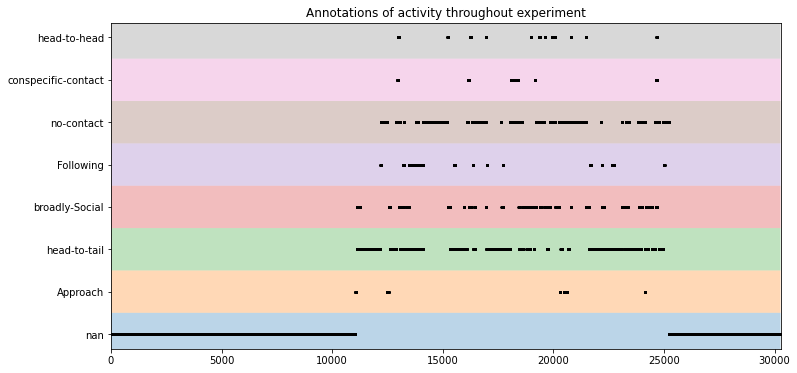

In [66]:
plt.figure(figsize=(12,6))
for i in range(len(n.unique(annotations))):
    plt.fill_between(ts, i-0.5, i+0.5, alpha=0.3)
plt.scatter(ts, annotations, s=3, color='k')
plt.xlim(min(ts), max(ts))
plt.title("Annotations of activity throughout experiment")

Text(0, 0.5, 'X Position (pixels)')

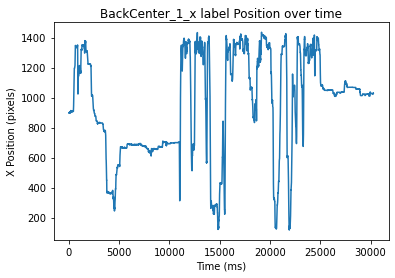

In [81]:
plt.plot(ts, experiment['BackCenter_1_x'])
plt.title("BackCenter_1_x label Position over time")
plt.xlabel("Time (ms)")
plt.ylabel("X Position (pixels)")

Text(0.5, 1.0, 'Trajectory of BackCenter for both mice between t=15000 and 16000')

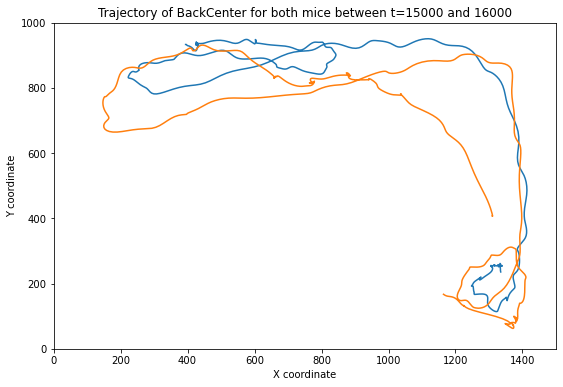

In [75]:
marker = 'BackCenter'
time = (15000,16000)
xlims = (0,1500)
ylims = (0,1000)
plt.figure(figsize=6*n.array([xlims[1]/ylims[1], 1]))


plt.plot(experiment[marker+'_1_x'][time[0]:time[1]],experiment[marker+'_1_y'][time[0]:time[1]])
plt.plot(experiment[marker+'_2_x'][time[0]:time[1]],experiment[marker+'_2_y'][time[0]:time[1]])

plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('X coordinate'); plt.ylabel("Y coordinate")
plt.title("Trajectory of %s for both mice between t=%d and %d" % (marker, time[0], time[1]))

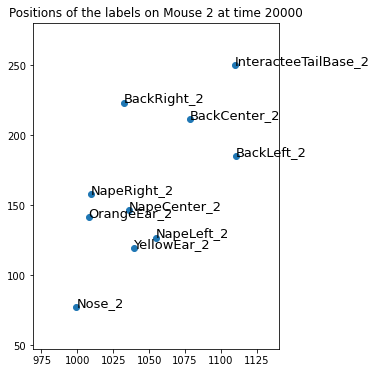

In [83]:

t = 20000
xs = []
ys = []
labs = []
for label in labels:
    mouse_idx = '2'
    if label[-1] == mouse_idx:
        xs.append(experiment[label+'_x'][t])
        ys.append(experiment[label+'_y'][t])
        labs.append(label)

xlims = (n.nanmin(xs) - 30, n.nanmax(xs)+30)
ylims = (n.nanmin(ys) - 30, n.nanmax(ys)+30)
plt.figure(figsize=6*n.array([(xlims[1]-xlims[0])/(ylims[1]-ylims[0]), 1]))
        
        
plt.scatter(xs, ys)
for i in range(len(xs)):
    plt.text(xs[i], ys[i], labs[i],fontsize=13)
    
plt.xlim(xlims)
plt.ylim(ylims)
plt.title("Positions of the labels on Mouse %s at time %d" % (mouse_idx, t))
plt.show()